Create a jupyter notebook called titanic.ipynd.
create in-dept eda on "titanic" dataset
include descriptions of EDA & visualisations

* What is the most important factor in determining survival of the Titanic incident
* In the movie, the upperclass plaasengers were given preference in the lifeboats. Does this show in the data?
* "women and children first" Was this the case?
* Add one otherobservation from dataset

import appropriate libraries
scipy stats for Box-Cox Transformation
mlxtend.preprocessing for min_max scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import statistics

import data

In [2]:
df =pd.read_csv("titanic.csv")

shape,  
column headings,
data types,
first 5 lines

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

object is a string problem for machine learning

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


How complete is the data?

In [7]:
missing_data = df.isnull().sum()
missing_data[:]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Notes:
Survival data = complete
Passenger class data = complete
sex data complete - age data incomplete (women & children first question)
Name - not useful 
possible analysis of fare - average cost per class?
cabin data incomplete - completed date could be used for mapping distance from deck with survival rate missing 687/891 makes data inuseable. Could be used post initial analysis to predict possible cabin locations of survivers.

column headings of sibsp, parch and embarked are unclear as to data recorded 
google: sibsp = Number of Siblings/Spouses Aboard
parch = Number of Parents/Children Aboard
embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

columns to remove 
- Name - anominity in data is acceptable for eda purposes
- ticket - inconsistent data type
- cabin - incomplete data without relevant application ie. layout mapping

In [8]:
df.drop(['Name', 'Ticket', 'Cabin',], axis=1, inplace=True)

In [9]:
df = df.dropna()

In [10]:
#Seperate survivers
df_sur = df.loc[df['Survived'].isin([1])]
df_die = df.loc[df['Survived'].isin([0])]

In [11]:
#Seperate genders
df_male = df.loc[df['Sex'].isin(['male'])]
df_female = df.loc[df['Sex'].isin(['female'])]

In [88]:
#define max age and min age
max_age = max(df['Age'])
min_age = min(df['Age'])

Initial Visualisations: distributions of passengers. 
1. Count of Passenger Survival
2. Count of Passengers by Class
3. Count of Passengers by Sex
4. Count of Passenger embarkment
5. Scatter Graph of Passenger Age, colour coded by Sex
6. Histogram of Passenger Age, Male
7. Histogram of Passenger Age, Female

<Axes: xlabel='Embarked', ylabel='count'>

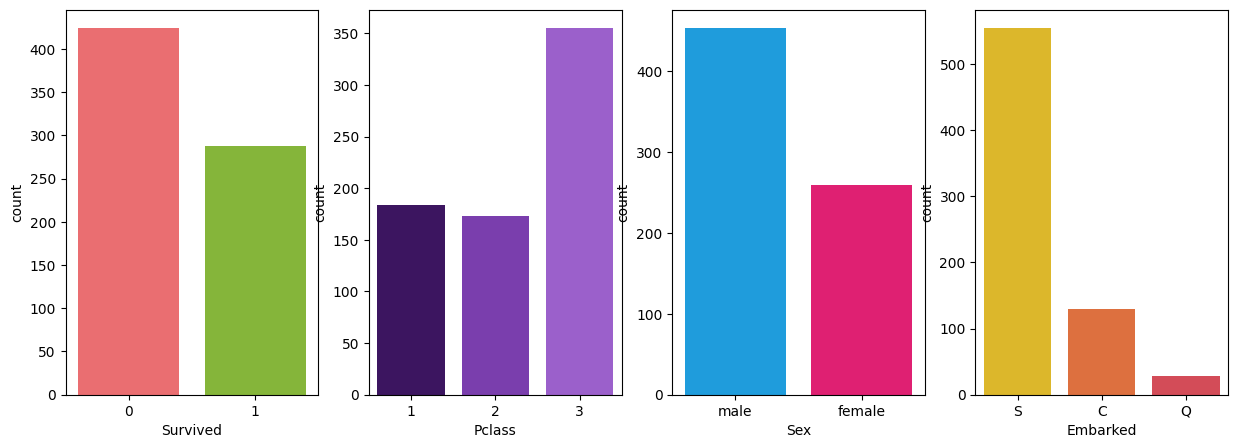

In [12]:
fig, (axis1,axis2,axis3,axis4,) = plt.subplots(1,4,figsize=(15,5))

#bar of survive vs died
#colour code used for ease green = survived
sns.countplot(data=df,
              x='Survived',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=False,
             ax=axis1,)
#bar of passenger class
sns.countplot(data=df,
              x='Pclass',
              hue ='Pclass',
              palette = ["#3c096c", "#7b2cbf", "#9d4edd"],
              legend=False,
             ax=axis2)
#bar of passenger sex
sns.countplot(data=df,
              x='Sex',
              hue='Sex',
              palette = ["#00a6fb", "#ff006e"],
              legend=False,
             ax=axis3)
#bar of where passengers embarked
sns.countplot(data=df,
              x='Embarked',
              hue='Embarked',
              palette = ["#f9c80e", "#f86624", "#ea3546"],
              legend=False,
             ax=axis4,)


Text(0.5, 0, ' ')

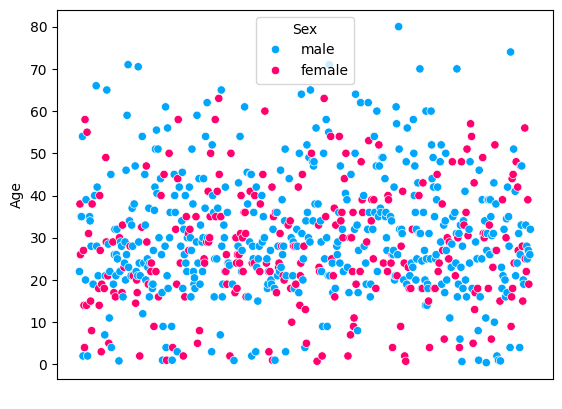

In [13]:
plt.figure
#scatter of passenger age
sns.scatterplot(data=df,
            x='PassengerId',
                hue = 'Sex',
                palette = ["#00a6fb", "#ff006e"],
            y='Age',)
plt.xticks([])
plt.xlabel(' ')

<Axes: xlabel='Age', ylabel='Count'>

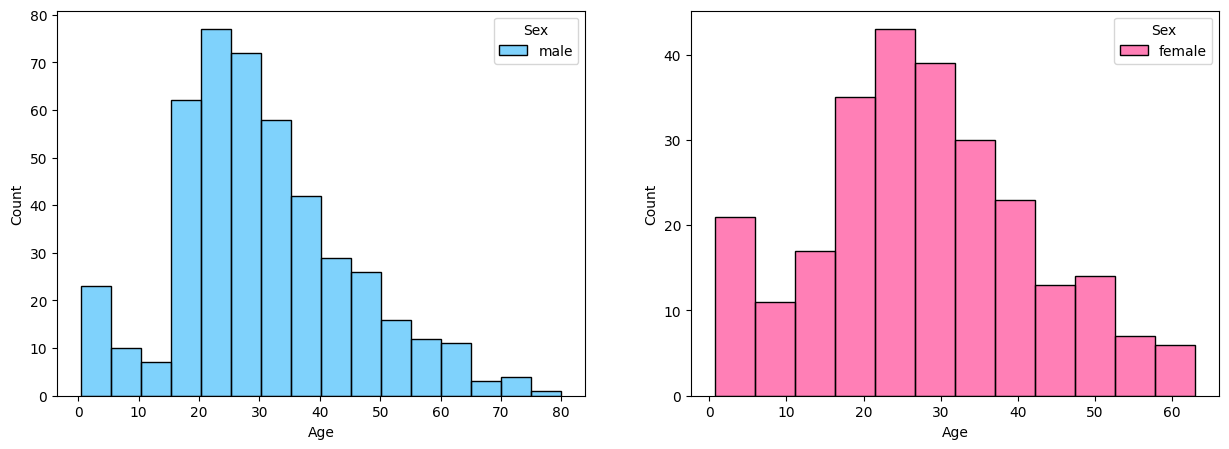

In [90]:
plt.figure
fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))
#histogram of passenger age by gender
sns.histplot(data=df_male,
             x='Age',
                hue = 'Sex',
                palette = ["#00a6fb",],
              bins = (max_age/5),
              binwidth = 5,
            ax=axis1)

sns.histplot(data=df_female,
             x='Age',
                hue = 'Sex',
              bins = (max_age/5),
              binwidth = 5,
                palette = ["#ff006e"],
            ax=axis2)

In [ ]:
#What is the most important factor in determining survival of the Titanic incident?

#look at survivers vs non
#'PassengerId', - index would not provide useful insight
#'Pclass', - bar of classes with survived vs not - expectation more form 1st class to survive, more from 3rd class to die
#'Sex', - bar of sexs with survived vs not - expectation more women to survive
#'Age', - histplots with KDE for count and percent
#'SibSp',
#'Parch', 
#'Fare', '
#'Embarked'

*Analysis of Survival*
1. Survivers by Class
2. Survivers by Sex

<Axes: xlabel='Sex', ylabel='count'>

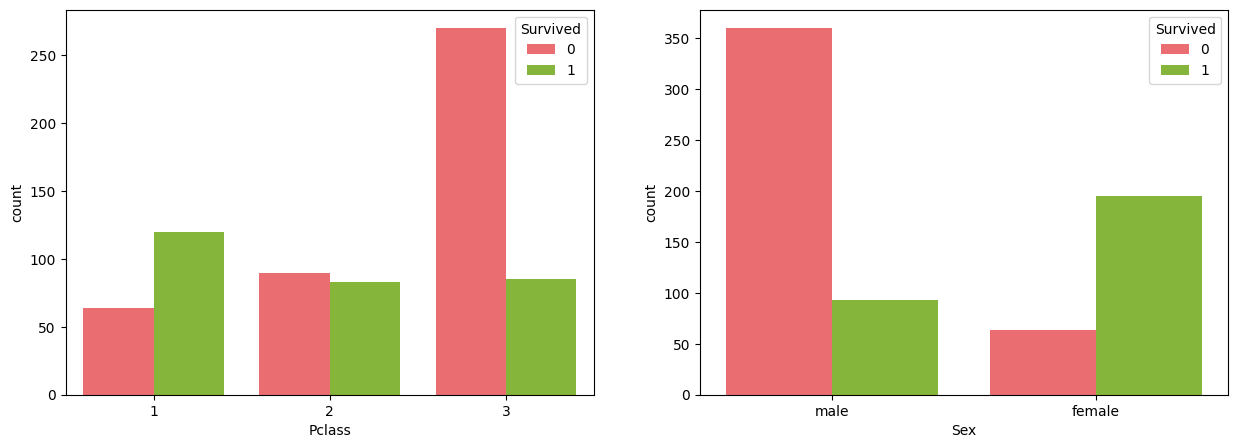

In [15]:
#Passengers Class and Passengers Sex
fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=df,
              x='Pclass',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis1)

sns.countplot(data=df,
              x='Sex',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis2)

Observations: 
First Class passengers were more likely to survive.
Second Class passengers had pretty even odds
Third Class passengers were unlikely to survive

Male passengers were less likely to survive than female passengers


In the movie, the upperclass plaasengers were given preference in the lifeboats. Does this show in the data?
Answer: 
In short, yes. 
In the above count chart it can be seen that more first class passengers survive than from any other class.
It can be infered that most survivers were in lifeboats.

3. Histogram of Survivers
4. Histogram of non-survivers

<function matplotlib.pyplot.show(close=None, block=None)>

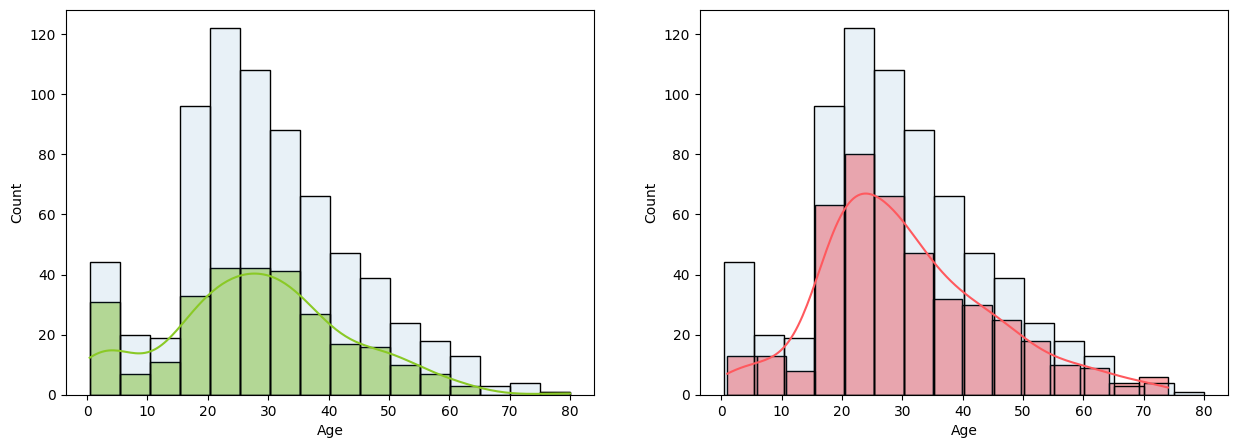

In [56]:



fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))

sns.histplot(data=df_sur,
              x='Age',
              hue ='Survived',
              palette = ["#8ac926"],
              bins = (max_age/5),
              binwidth = 5,
              kde = True,
              legend=False,
              ax=axis1)

sns.histplot(data=df,
             x='Age',
             alpha=0.1,
             bins = (max_age/5),
             binwidth = 5,
             ax=axis1)

sns.histplot(data=df_die,
              x='Age',
              hue ='Survived',
              palette = ["#ff595e"],
              bins = (max_age/5),
              binwidth = 5,
              kde = True,
              legend=False,
              ax=axis2)

sns.histplot(data=df,
             x='Age',
             alpha=0.1,
             bins = (max_age/5),
             binwidth = 5,
             ax=axis2)

plt.show

In [ ]:
Observations: 
A higher percent of children survived per age group


"women and children first" Was this the case?
Answer:
In short, yes.
A higher percent of children survived per age group, and significantly more women survived then men. 
It can be infered that most survivers were in lifeboats.

5. Survivers distributed by the Number of Siblings/Spouses they had Aboard
6. Survivers distributed by the Number of Parents/Children they had Aboard

<Axes: xlabel='Parch', ylabel='count'>

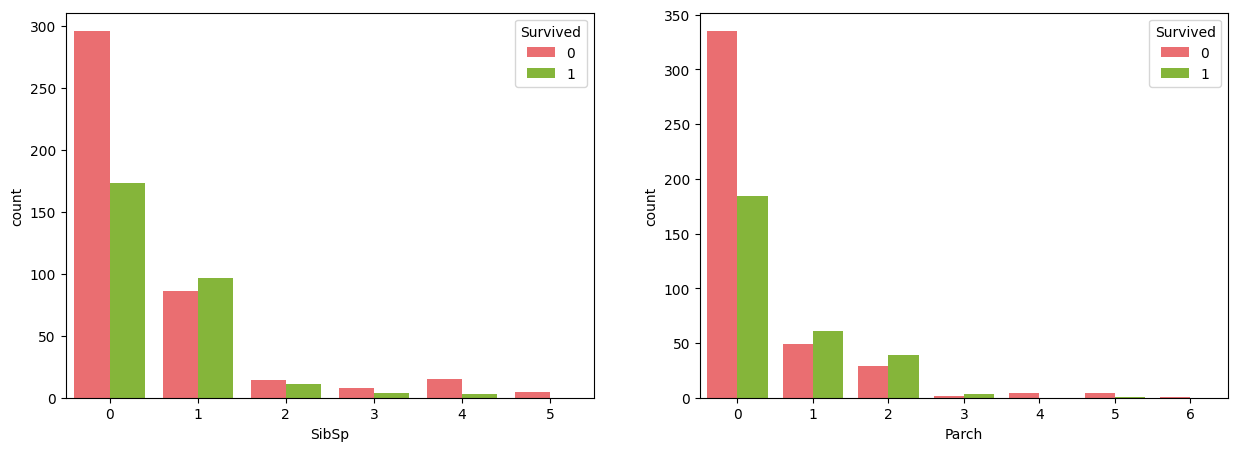

In [54]:
fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=df,
              x='SibSp',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis1)
sns.countplot(data=df,
              x='Parch',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis2)

Observations:
Those with only 1 sibling or spouse were most likely to survive

Those with 1-3 parents and/or children aboard were most likely to survive

with more than 1 sibling or more than 3 children people were quickly less likely to survive. This could be linked to family size and/or class

There may be an interaction between, data on family size could be beneficial.

In [58]:
#create family size data
df['Family'] = df['SibSp'] + df['Parch']

<Axes: xlabel='Family', ylabel='count'>

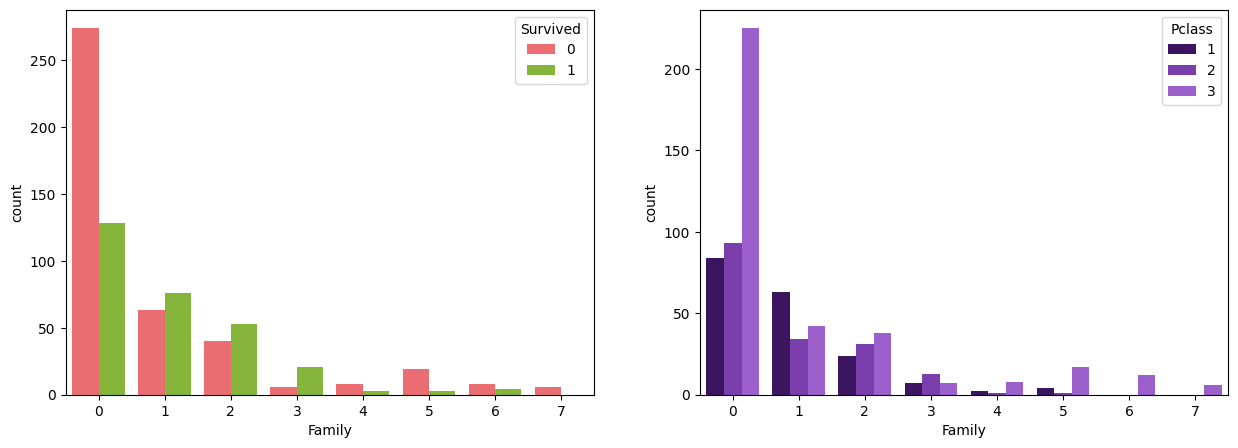

In [61]:
fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=df,
              x='Family',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis1)

sns.countplot(data=df,
              x='Family',
              hue ='Pclass',
              palette = ["#3c096c", "#7b2cbf", "#9d4edd"],
              legend=True,
             ax=axis2)

<Axes: xlabel='Family', ylabel='count'>

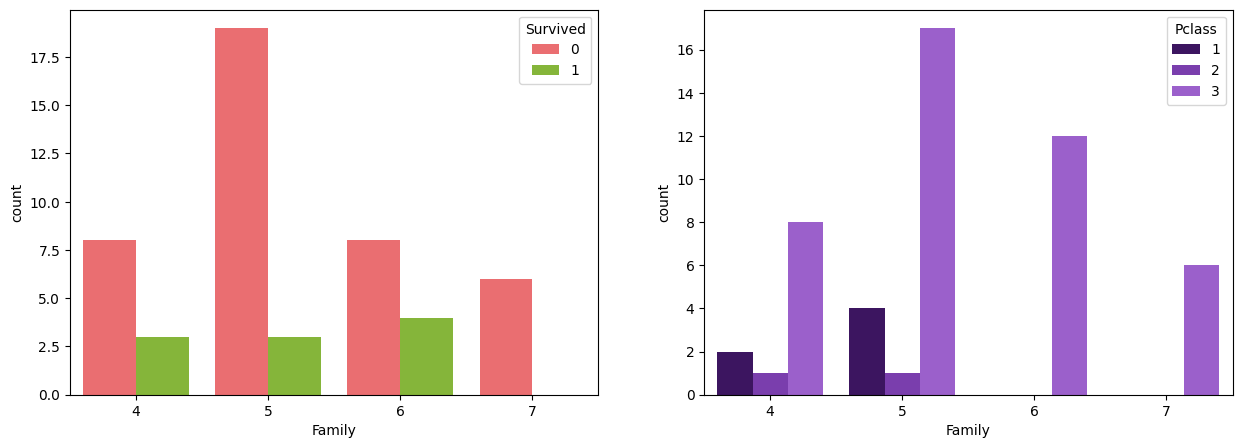

In [82]:
#tighten into larger family size
large_family=df.loc[df['Family'].isin([4,5,6,7])]

fig, (axis1,axis2,) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=large_family,
              x='Family',
              hue ='Survived',
              palette = ["#ff595e", "#8ac926"],
              legend=True,
             ax=axis1)

sns.countplot(data=large_family,
              x='Family',
              hue ='Pclass',
              palette = ["#3c096c", "#7b2cbf", "#9d4edd"],
              legend=True,
             ax=axis2)

Observations:
Trend towards larger families being of a lower class and having worse survival rate

What is the most important factor in determining survival of the Titanic incident?
Answer:
In short, Sex. 
However, there is no one factor which garenteed survival. 
From the data the most likely to survive would be a woman, aged between 20-30, in first class, with no family onboard.

Add one otherobservation from dataset
Answer:
There was no survival benefit to having family aboard